# Web Scrapping  
  
In this project we will try to extract data from <font color='9E9E9E'>macrotrends.net</font> website by web scrapping.
Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. We will extract quarterly revenue data of Tesla, visualize it and save it into a png format.

###### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

###### Load the webpage in to a variable

In [49]:
page = requests.get('https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue')

###### Parsing HTML data with BeautifulSoup

In [50]:
soup = BeautifulSoup(page.text, 'html.parser')

In [59]:
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2009-2020 | TSLA | MacroTrends</title>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2009 to 2020. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter ending December 31, 

###### Finding the desired table body from html codes

In [57]:
tablebody = soup.find_all('tbody')[1]

In [60]:
tablebody

<tbody>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744</td>
</tr>
<tr>
<td style="text-align:center">2020-09-30</td>
<td style="text-align:center">$8,771</td>
</tr>
<tr>
<td style="text-align:center">2020-06-30</td>
<td style="text-align:center">$6,036</td>
</tr>
<tr>
<td style="text-align:center">2020-03-31</td>
<td style="text-align:center">$5,985</td>
</tr>
<tr>
<td style="text-align:center">2019-12-31</td>
<td style="text-align:center">$7,384</td>
</tr>
<tr>
<td style="text-align:center">2019-09-30</td>
<td style="text-align:center">$6,303</td>
</tr>
<tr>
<td style="text-align:center">2019-06-30</td>
<td style="text-align:center">$6,350</td>
</tr>
<tr>
<td style="text-align:center">2019-03-31</td>
<td style="text-align:center">$4,541</td>
</tr>
<tr>
<td style="text-align:center">2018-12-31</td>
<td style="text-align:center">$7,226</td>
</tr>
<tr>
<td style="text-align:center">2018-09-30</td>
<td style="text-align:center">$6,824</td>
</tr>
<

###### Clearing tr tags and loading all table data

In [58]:
rowdata = tablebody.find_all('td')

In [6]:
rowdata

[<td style="text-align:center">2020-12-31</td>,
 <td style="text-align:center">$10,744</td>,
 <td style="text-align:center">2020-09-30</td>,
 <td style="text-align:center">$8,771</td>,
 <td style="text-align:center">2020-06-30</td>,
 <td style="text-align:center">$6,036</td>,
 <td style="text-align:center">2020-03-31</td>,
 <td style="text-align:center">$5,985</td>,
 <td style="text-align:center">2019-12-31</td>,
 <td style="text-align:center">$7,384</td>,
 <td style="text-align:center">2019-09-30</td>,
 <td style="text-align:center">$6,303</td>,
 <td style="text-align:center">2019-06-30</td>,
 <td style="text-align:center">$6,350</td>,
 <td style="text-align:center">2019-03-31</td>,
 <td style="text-align:center">$4,541</td>,
 <td style="text-align:center">2018-12-31</td>,
 <td style="text-align:center">$7,226</td>,
 <td style="text-align:center">2018-09-30</td>,
 <td style="text-align:center">$6,824</td>,
 <td style="text-align:center">2018-06-30</td>,
 <td style="text-align:center">

###### Clearing all HTML tags with re library

In [7]:
import re

In [8]:
CLEAN = re.compile('\s+')
rowdata = [CLEAN.sub(' ', a.text.replace('\n', ',')).strip() for a in rowdata]

In [9]:
rowdata

['2020-12-31',
 '$10,744',
 '2020-09-30',
 '$8,771',
 '2020-06-30',
 '$6,036',
 '2020-03-31',
 '$5,985',
 '2019-12-31',
 '$7,384',
 '2019-09-30',
 '$6,303',
 '2019-06-30',
 '$6,350',
 '2019-03-31',
 '$4,541',
 '2018-12-31',
 '$7,226',
 '2018-09-30',
 '$6,824',
 '2018-06-30',
 '$4,002',
 '2018-03-31',
 '$3,409',
 '2017-12-31',
 '$3,288',
 '2017-09-30',
 '$2,985',
 '2017-06-30',
 '$2,790',
 '2017-03-31',
 '$2,696',
 '2016-12-31',
 '$2,285',
 '2016-09-30',
 '$2,298',
 '2016-06-30',
 '$1,270',
 '2016-03-31',
 '$1,147',
 '2015-12-31',
 '$1,214',
 '2015-09-30',
 '$937',
 '2015-06-30',
 '$955',
 '2015-03-31',
 '$940',
 '2014-12-31',
 '$957',
 '2014-09-30',
 '$852',
 '2014-06-30',
 '$769',
 '2014-03-31',
 '$621',
 '2013-12-31',
 '$615',
 '2013-09-30',
 '$431',
 '2013-06-30',
 '$405',
 '2013-03-31',
 '$562',
 '2012-12-31',
 '$306',
 '2012-09-30',
 '$50',
 '2012-06-30',
 '$27',
 '2012-03-31',
 '$30',
 '2011-12-31',
 '$39',
 '2011-09-30',
 '$58',
 '2011-06-30',
 '$58',
 '2011-03-31',
 '$49',
 '20

###### Separating and saving dates and revenues into different lists

In [10]:
dates = rowdata[0::2]
revenues = rowdata[1::2]

In [11]:
revenues

['$10,744',
 '$8,771',
 '$6,036',
 '$5,985',
 '$7,384',
 '$6,303',
 '$6,350',
 '$4,541',
 '$7,226',
 '$6,824',
 '$4,002',
 '$3,409',
 '$3,288',
 '$2,985',
 '$2,790',
 '$2,696',
 '$2,285',
 '$2,298',
 '$1,270',
 '$1,147',
 '$1,214',
 '$937',
 '$955',
 '$940',
 '$957',
 '$852',
 '$769',
 '$621',
 '$615',
 '$431',
 '$405',
 '$562',
 '$306',
 '$50',
 '$27',
 '$30',
 '$39',
 '$58',
 '$58',
 '$49',
 '$36',
 '$31',
 '$28',
 '$21',
 '',
 '$46',
 '$27',
 '']

###### Creating dataframe with the existing lists; dates and revenues

In [12]:
tesla_revenue = pd.DataFrame({'Date': dates,
                             'Revenue': revenues,})

In [13]:
tesla_revenue

,Date,Revenue
0,2020-12-31,"$10,744"
1,2020-09-30,"$8,771"
2,2020-06-30,"$6,036"
3,2020-03-31,"$5,985"
4,2019-12-31,"$7,384"
5,2019-09-30,"$6,303"
6,2019-06-30,"$6,350"
7,2019-03-31,"$4,541"
8,2018-12-31,"$7,226"
9,2018-09-30,"$6,824"


###### Removing dollar sign and comma from the revenue column

In [14]:
tesla_revenue.Revenue = tesla_revenue.Revenue.str[1:]
tesla_revenue.Revenue = tesla_revenue.Revenue.str.replace(',', '')

In [15]:
tesla_revenue

,Date,Revenue
0,2020-12-31,10744
1,2020-09-30,8771
2,2020-06-30,6036
3,2020-03-31,5985
4,2019-12-31,7384
5,2019-09-30,6303
6,2019-06-30,6350
7,2019-03-31,4541
8,2018-12-31,7226
9,2018-09-30,6824


###### Droping rows that have missing values and reseting index

In [16]:
tesla_revenue = tesla_revenue.replace('', np.nan)
tesla_revenue = tesla_revenue.dropna(axis=0)
tesla_revenue = tesla_revenue.reset_index(drop=True)

In [61]:
tesla_revenue

,Date,Revenue
0,2009-06-30,27
1,2009-09-30,46
2,2010-03-31,21
3,2010-06-30,28
4,2010-09-30,31
5,2010-12-31,36
6,2011-03-31,49
7,2011-06-30,58
8,2011-09-30,58
9,2011-12-31,39


###### Sorting the Date column and resting index

In [17]:
tesla_revenue = tesla_revenue.sort_values('Date')
tesla_revenue.reset_index(drop=True, inplace=True )
tesla_revenue

,Date,Revenue
0,2009-06-30,27
1,2009-09-30,46
2,2010-03-31,21
3,2010-06-30,28
4,2010-09-30,31
5,2010-12-31,36
6,2011-03-31,49
7,2011-06-30,58
8,2011-09-30,58
9,2011-12-31,39


###### Converting Revenue column into integer

In [18]:
tesla_revenue.Revenue = tesla_revenue['Revenue'].astype(int)

In [19]:
tesla_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     46 non-null     object
 1   Revenue  46 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 680.0+ bytes


###### Importing matplotlib library and visualizing dataframe in a customized line chart

In [20]:
import matplotlib.pyplot as plt

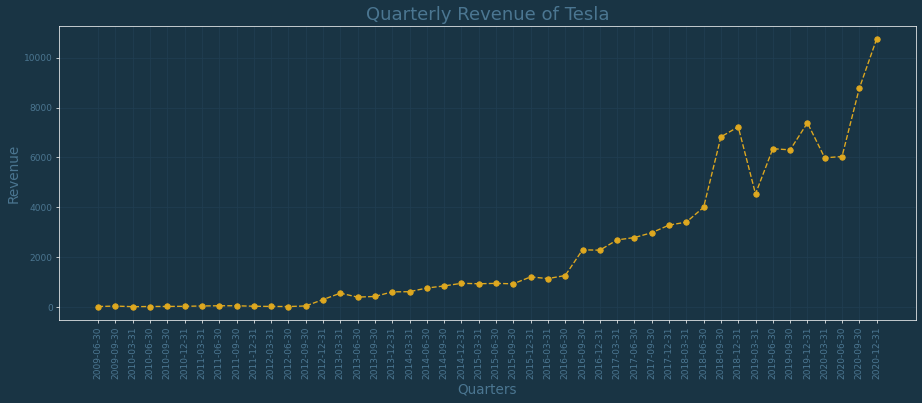

In [56]:
plt.figure(figsize=(17,6), dpi=65, facecolor='#193444')
plt.style.use('dark_background')
plt.axes().set(facecolor='#193444')
plt.plot(tesla_revenue.Date, tesla_revenue.Revenue, 'o--', color='#DEA820')
plt.title('Quarterly Revenue of Tesla', fontsize=20, color='#4B7691')
plt.xlabel('Quarters', fontsize=15, color='#4B7691')
plt.ylabel('Revenue', fontsize=15, color='#4B7691')
plt.xticks(rotation='vertical', color='#4B7691')
plt.yticks(color='#4B7691')
plt.grid(False, color='#203F52')
plt.show()

In [22]:
plt.savefig('linechart.png')

<Figure size 432x288 with 0 Axes>